
<center><h1> Statistics of Indian School Education </h1></center>

<center>The goal of this notebook is to dig some facts about the quality of Indian Education from 2013 - 2016 and help people of India and Government of India to understand better about the state of Indian Schools to take immediate actions if needed.</center>

<div style="text-align:center"><img src="https://www.shethepeople.tv/wp-content/uploads/2017/09/RIGHT-TO-EDUCATION.jpg"/></div>

# Table Of Contents

1. Exploratory Data Analysis (EDA)
    - What do you gain through EDA?
    - EDA Techniques
2. Gross Enrollment Ratio (GER)
    - Calculation Method
    - All India GER
    - State-wise GER
3. Dropout Ratio
    - All India Dropout Ratio
    - State-wise Dropout Ratio
4. Percentage of Schools with Electricity, Water, Toilet and Computer Facilities
5. Conclusion

# Exploratory Data Analysis (EDA)

Although many of you might be familiar with what EDA is all about, I would like to take a minute and give a formal definition of EDA and set the tone for this notebook for beginners and experts as well.

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by **John Tukey** to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.


## What do you gain through EDA?

Below are few among many points where EDA helps us:

- maximize insight into a data set;
- uncover underlying structure;
- extract important variables;
- detect outliers and anomalies;
- test underlying assumptions;
- develop parsimonious models; and
- determine optimal factor settings.

## EDA Techniques

Most EDA techniques are graphical in nature with a few quantitative techniques. The reason for the heavy reliance on graphics is that by its very nature the main role of EDA is to open-mindedly explore, and graphics gives the analysts unparalleled power to do so, enticing the data to reveal its structural secrets, and being always ready to gain some new, often unsuspected, insight into the data.

The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

- Plotting the raw data (such as data traces, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.
- Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
- Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.

# Gross Enrollment Ratio

Gross Enrolment Ratio (GER) or Gross Enrolment Index (GEI) is a statistical measure used in the education sector, to determine the **number of students enrolled in school at several different grade levels (like elementary, middle school and high school), and use it to show the ratio of the number of students who live in that country to those who qualify for the particular grade level**.

The GER can be over 100% as it includes students who may be older or younger than the official age group. 

For instance, in India it improved from 25.8 to 26.3, the **GER includes students who are repeating a grade, those who enrolled late and are older than their classmates, or those who have advanced quickly and are younger than their classmates**. This allows the total enrolment to exceed the population that corresponds to that level of education.

## Calculation Method

### a = number of students enrolled in a given level
### b = population of the age group corresponds to given level of education India

### $GER = \frac{a}{b} \times 100$

In [42]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import descartes

In [43]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv
/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv


In [44]:
df_ger = pd.read_csv('../input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')
df_ger.head(10)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7
5,Chandigarh,2013-14,88.42,96.09,91.85,99.93,103.02,101.27,92.08,92.16,92.11,90.5,92.88,91.49
6,Chhattisgarh,2013-14,104.06,103.93,103.99,100.35,101.10,100.72,96.68,99.32,97.99,58.27,56.16,57.23
7,Dadra & Nagar Haveli,2013-14,89.50,81.89,85.78,100.76,91.43,96.22,87.79,79.08,83.66,37.77,41.99,39.64
8,Daman & Diu,2013-14,87.80,89.78,88.69,84.06,90.61,86.97,67.94,82.20,73.88,34.37,64.55,44.36
9,Delhi,2013-14,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.3,100.42


In [45]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float64
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float64
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non-null    float64
 9   Secondary_Girls         110 non-null    float64
 10  Secondary_Total         110 non-null    float64
 11  Higher_Secondary_Boys   110 non-null    object 
 12  Higher_Secondary_Girls  110 non-null    object 
 13  Higher_Secondary_Total  110 non-null    object 
dtypes: float64(9), object(5)
memory usage: 12.

In [46]:
# Arrange the `year` column in ascending order
df_ger = df_ger.sort_values('Year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
ger_ai = df_ger[df_ger['State_UT'] == 'All India'].reset_index(drop=True)

In [47]:
print("Gross Enrollment Ratio - All India (2013-2016)")
display(ger_ai)

Gross Enrollment Ratio - All India (2013-2016)


,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
1,All India,2014-15,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
2,All India,2015-16,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


As you can see, the columns `Higher_Secondary_Boys`,`Higher_Secondary_Girls`, and `Higher_Secondary_Total` has `dtype` as `object` instead of `float` like the rest of them. When I tried to change the column into `float` type, I got the error that there's a string `NR` inside one or more of the cells. Which means that we have few rows where the data was **NOT RECORDED**. This doesn't necessarily mean we should substitute that value with zero because that undermines the total Gross Enrollment Ratio (refer to the calculation method of GER). Instead, we will just drop the rows which contain these strings or other dtypes if it's not a float.

**_TL;DR_** 
- **Removing `NR` and `@` strings which are in the columns: Higher_Secondary_Boys`,`Higher_Secondary_Girls`, and `Higher_Secondary_Total`**

In [48]:
def drop_rows(dataframe,given_list,search_value):
    """Dropping the rows which are not `float64` type.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
    
    given_list : list
                List of column names
    
    search_value : string
                String to search and remove the corresponding row
    
    Returns
    -------
    dataframe : pandas.DataFrame
    """
    for i in given_list:
        dataframe = dataframe[~dataframe[i].str.contains(search_value)].reset_index(drop=True)
    
    return dataframe

In [49]:
ger_column_list = ['Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']

In [50]:
df_ger = drop_rows(df_ger,ger_column_list,'NR')
df_ger = drop_rows(df_ger,ger_column_list,'@')

Now that we presumably removed all eccentric rows, let's convert these columns into `float` type so that we can work with the dataframe.

In [51]:
def convert_to_float(dataframe,given_list,which_type):
    """To convert a column to desired type. In this case, from object to float.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
    
    given_list : list
                List of column names for which data type should be converted.
    
    which_type : dtype
    
    Returns
    -------
    dataframe : pandas.DataFrame
    """
    for i in given_list:
        dataframe[i] = dataframe[i].astype(which_type)
    return dataframe

In [52]:
df_ger = convert_to_float(df_ger,ger_column_list,float)

We now have a clean dataframe to work with.

In [53]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                108 non-null    object 
 1   Year                    108 non-null    object 
 2   Primary_Boys            108 non-null    float64
 3   Primary_Girls           108 non-null    float64
 4   Primary_Total           108 non-null    float64
 5   Upper_Primary_Boys      108 non-null    float64
 6   Upper_Primary_Girls     108 non-null    float64
 7   Upper_Primary_Total     108 non-null    float64
 8   Secondary_Boys          108 non-null    float64
 9   Secondary_Girls         108 non-null    float64
 10  Secondary_Total         108 non-null    float64
 11  Higher_Secondary_Boys   108 non-null    float64
 12  Higher_Secondary_Girls  108 non-null    float64
 13  Higher_Secondary_Total  108 non-null    float64
dtypes: float64(12), object(2)
memory usage: 11

Let's compare **All India Gross Enrollment Ratio** between Girls and Boys from 2013 - 2016.

In [54]:
ger_girls_list = ['State_UT','Year','Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']
ger_boys_list = ['State_UT','Year','Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']

ger_girls = ger_ai.loc[:,ger_girls_list]
ger_boys = ger_ai.loc[:,ger_boys_list]

In [55]:
# preparing the dataframe for seaborn plots

tidy_girls = pd.melt(ger_girls,id_vars=['Year','State_UT']).rename(columns=str.title)
tidy_boys = pd.melt(ger_boys,id_vars=['Year','State_UT']).rename(columns=str.title)

## All India GER

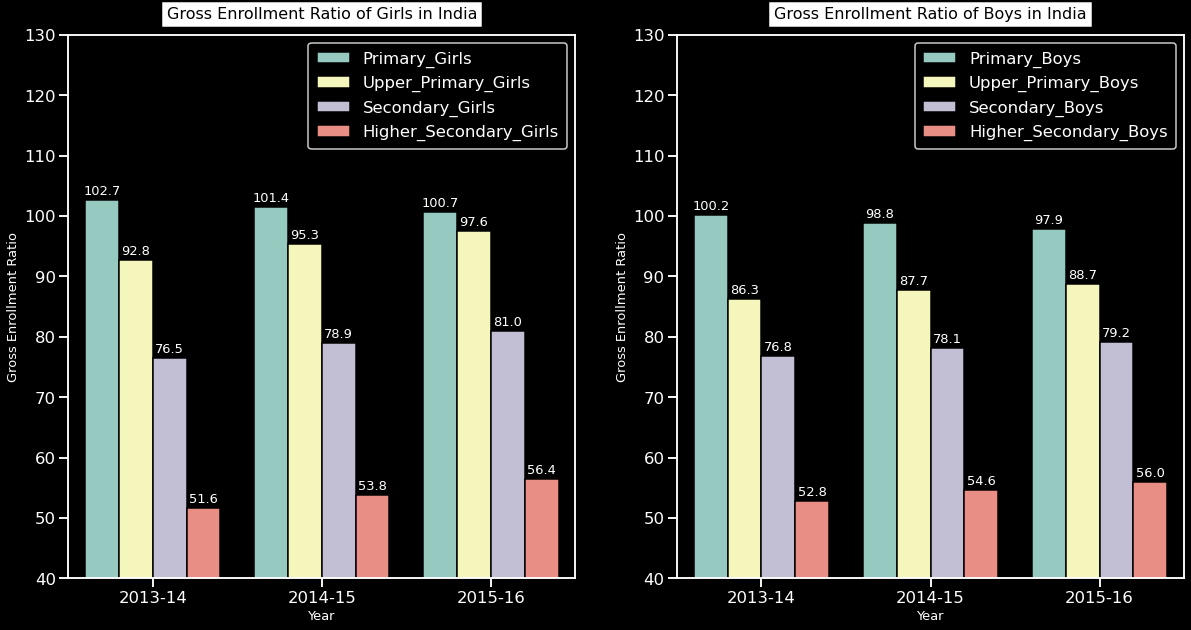

In [56]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('dark_background')

# creating two subplots: girls and boys
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# -------------------------------------------------------------- #

# barplot for girls
ger_girls_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_girls,edgecolor='black',ax=axes[0])
ger_girls_bplot.set(ylim=(40, 130))
for p in ger_girls_bplot.patches:
    ger_girls_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[0].set_title('Gross Enrollment Ratio of Girls in India',size = 16 , pad = 16, color='black',bbox=dict(facecolor='white', alpha=1.0))

axes[0].set_ylabel('Gross Enrollment Ratio',size=13)
axes[0].set_xlabel('Year',size=13)

ger_girls_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

# ------------------------------------------------------------------- #

# barplot for boys
ger_boys_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_boys,edgecolor='black',ax=axes[1])
ger_boys_bplot.set(ylim=(40, 130))
for p in ger_boys_bplot.patches:
    ger_boys_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[1].set_title('Gross Enrollment Ratio of Boys in India',size = 16 , pad = 16, color='black',bbox=dict(facecolor='white', alpha=1.0))

axes[1].set_ylabel('Gross Enrollment Ratio',size=13)
axes[1].set_xlabel('Year',size=13)

ger_boys_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

### Girls

Let's see how the trends have been in Gross Enrollment Ratio for Girls.

- Girls who join Primary School have exceeded 100 GER which means the students also include who are repeating a grade, or those who enrolled late and are older than their classmates, or those who have advanced quickly and are younger than their classmates. This is a positive sign in a developing country like India.
- However, the ratio has been consistently decreasing over the years. There could be two reasons for this decrease:
    1. Either students who are repeating grades & those who have enrolled late are decreasing over time,
    2. Or, there's an actual decrease in enrollments for primary schools among girls.
- Indian Government has look into this to take a quick action if it's the second reason.
- There's a considerable increase in GER from 2013-2016 for girls who are joining Upper Primary, Secondary, and Higher Secondary Schools. This is again a very positive sign.

### Boys

Let's see how the trends have been in Gross Enrollment Ratio for Boys.

- The trends for Primary Schools are the same as girls. Again, if we could look further into data about the GER, we could gather some important information as to why there's a decrease in GER for Girls and Boys.
- Compared to Girls, the GER of Boys in Upper Primary is very low. This is a negative sign because this might affect the enrollments of Secondary and Higher Secondary Schools among boys.

### General

- We can also observe that there's a big difference between Secondary and Higher Secondary Enrollments. There could be many reasons like:
    1. Students might migrate to better colleges in cities/towns.
    2. They might enroll themselves in Coaching Centres such as IIT/AIEEE/etc.


## State-wise GER

Let's visualize the Gross Enrollment Ratio of all the states in India using an India Map.

In [57]:
# Dataframe for only states

ger_states = df_ger[df_ger['State_UT'] != 'All India'].reset_index(drop=True)

In [58]:
ger_states.State_UT.unique()

array(['Andaman & Nicobar Islands', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Pondicherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Madhya Pradesh', 'Lakshadweep', 'Karnataka',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Kerala',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Chandigarh', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Jharkhand', 'Daman & Diu', 'Telangana',
       'MADHYA PRADESH', 'Uttarakhand', 'Puducherry', 'Odisha'],
      dtype=object)

In [59]:
#renaming state names
ger_states['State_UT'].replace({"Andaman & Nicobar Islands": "A and N Islands",
                      'Jammu And Kashmir':'J & K',
                      'MADHYA PRADESH':'Madhya Pradesh',
                      'Pondicherry':'Puducherry'
                     }, inplace=True)

ger_states_girls = ger_states.loc[:,ger_girls_list]
ger_states_boys = ger_states.loc[:,ger_boys_list]

In [60]:
# Add 'india-states' dataset to your working directory and perform the analysis

fp = "../input/india-states/Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

# renaming state names
map_df['st_nm'].replace({"Andaman & Nicobar Island": "A and N Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra & Nagar Haveli',
                      'Jammu & Kashmir':'J & K',
                      'NCT of Delhi':'Delhi',
                     }, inplace=True)

# Merging `ger_states_girls` and `map_df`

merged_girls = map_df.set_index('st_nm').join(ger_states_girls.set_index('State_UT')).dropna()
merged_boys = map_df.set_index('st_nm').join(ger_states_boys.set_index('State_UT')).dropna()

# use this if you want to annotate the map with numbers

# merged_girls['coords'] = merged_girls['geometry'].apply(lambda x: x.representative_point().coords[:])
# merged_girls['coords'] = [coords[0] for coords in merged_girls['coords']]

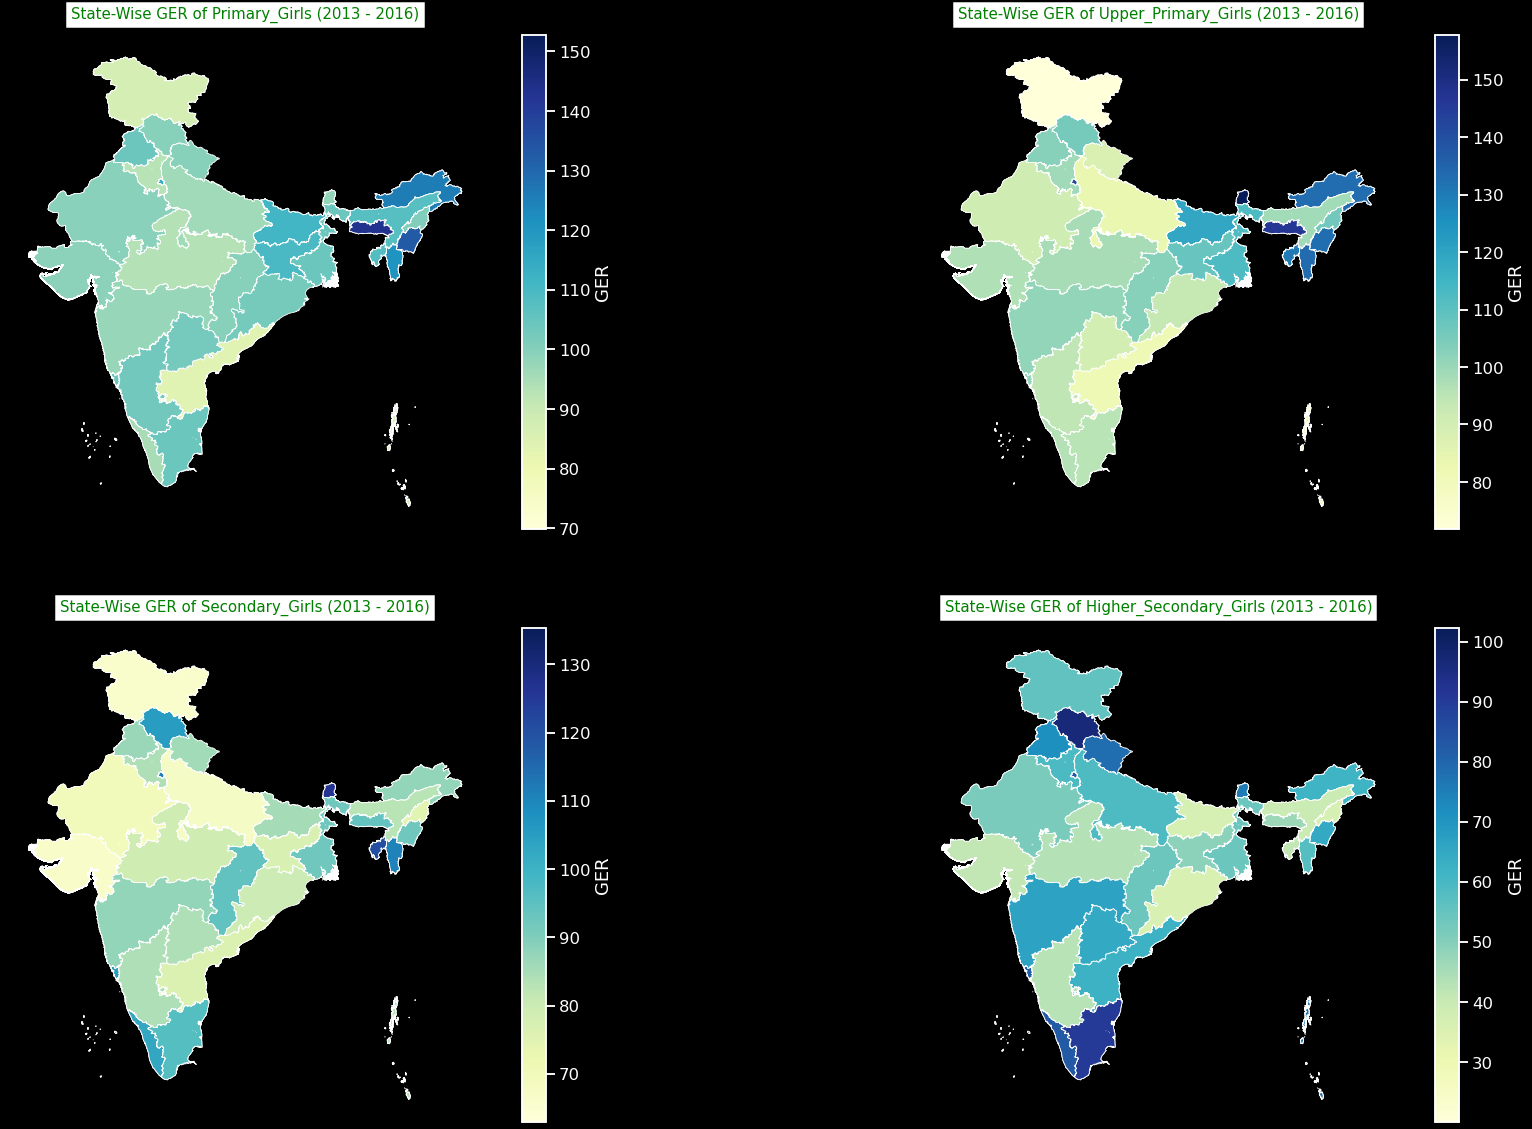

In [61]:
# State-wise plots of GER for Girls in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'green'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'YlGnBu'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise GER of Primary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g1 = merged_girls.plot(column='Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[0,1].set_title("State-Wise GER of Upper_Primary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g2 = merged_girls.plot(column='Upper_Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,0].set_title("State-Wise GER of Secondary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
g3 = merged_girls.plot(column='Secondary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,1].set_title("State-Wise GER of Higher_Secondary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g4 = merged_girls.plot(column='Higher_Secondary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

### Girls

- It's clear from the graph that the Primary_Girls GER is the highest for Eastern states like Assam, Mizoram, etc and it's the lowest for Andhra Pradesh and J & K.
- Upper_Primary_Girls GER is the lowest in J & K and that too at an alarming number! AP also has a lot of room for improvement in its GER.
- Secondary_Girls GER top 3 lowest states are J & K, Uttar Pradesh, and Gujarat. This is really concerning. 
- I see a lot of Yellow and Orange in different states for Higher_Secondary_Girls and that's a really good sign!

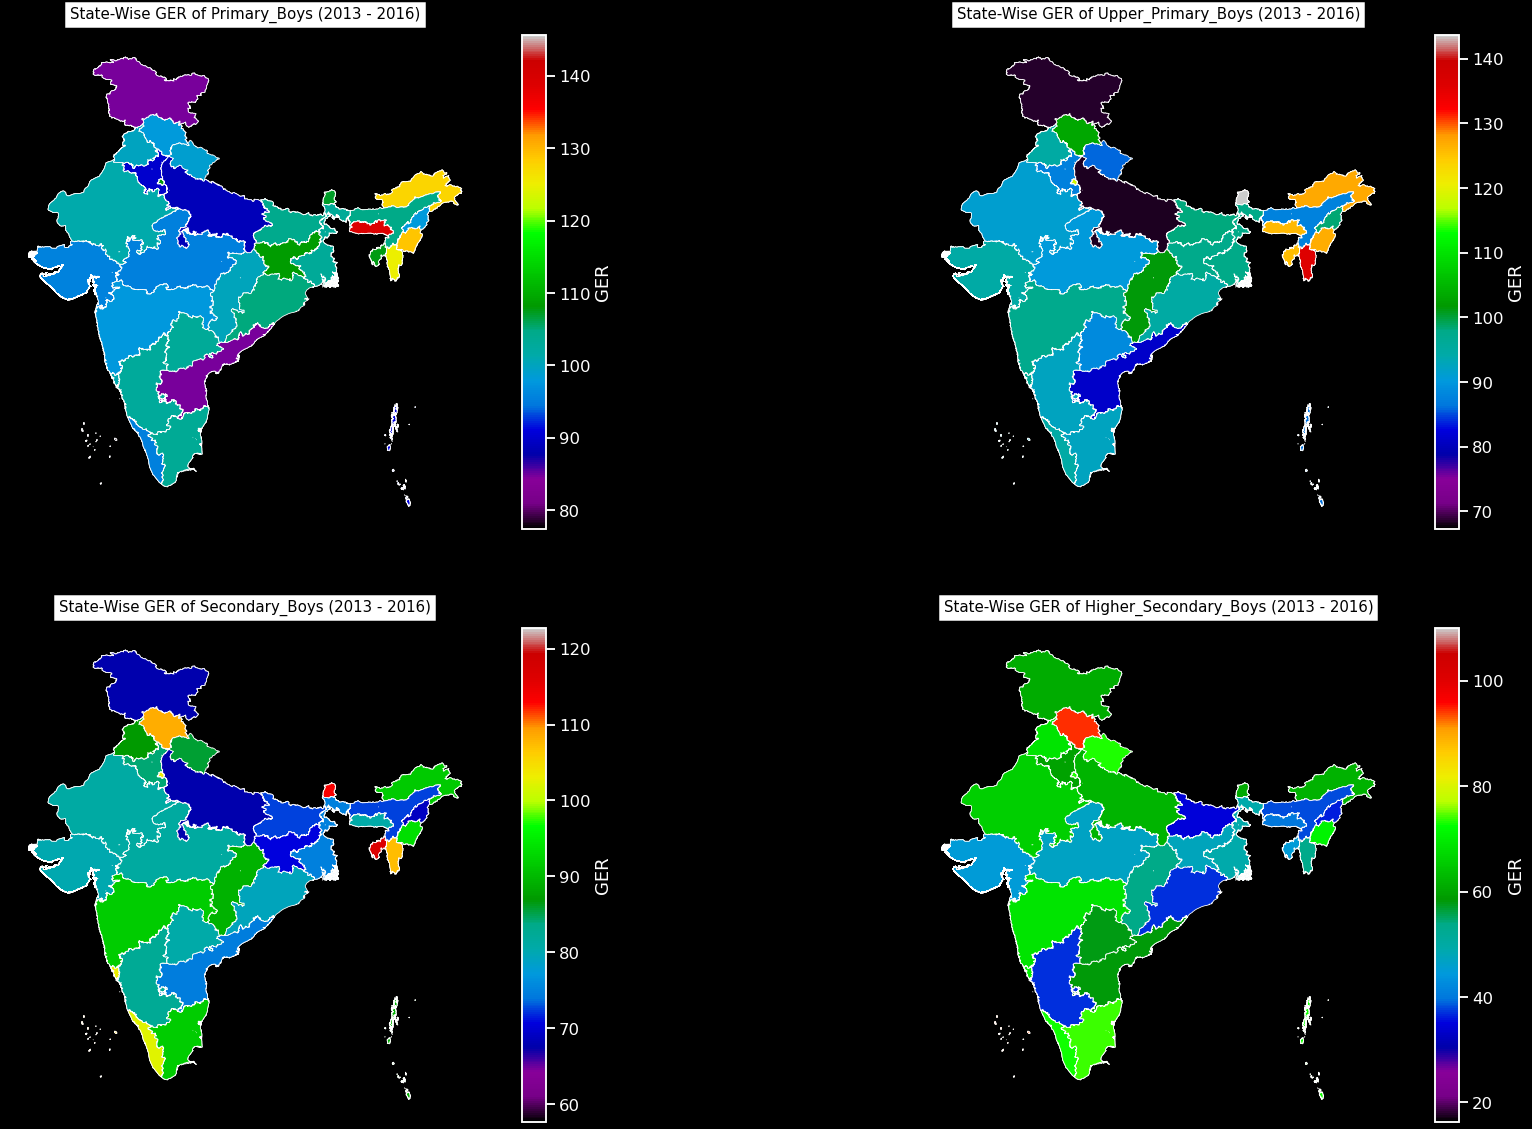

In [62]:
# State-wise plots of GER for Boys in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'nipy_spectral'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise GER of Primary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b1 = merged_boys.plot(column='Primary_Boys',cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[0,1].set_title("State-Wise GER of Upper_Primary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b2 = merged_boys.plot(column='Upper_Primary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,0].set_title("State-Wise GER of Secondary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b3 = merged_boys.plot(column='Secondary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,1].set_title("State-Wise GER of Higher_Secondary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b4 = merged_boys.plot(column='Higher_Secondary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

### Boys

- Like Girls, Primary_Boys' GER also follows almost similar pattern.
- Top 2 Lowest for Upper_Primary_Boys' GER are J & K and Uttar Pradesh.
- Compared to Girls, Boys' GER in Secondary Schools is not so alarming.
- The pattern for Higher Secondary Boys look similar to the Girls.

## Note

- **These maps look really nice and easy on the eyes to grab attention for a reader. However, it's too easy to lose important information on states which are really tiny like: Goa, Andaman and Nicobar Islands, Daman and Diu, etc.**

To overcome this problem, you can do the following:

1. Make barplots for every state and annotate them with numbers to get a better understanding.
2. Use plotly to map geographical data.
3. Plot few states separately to understand which colour they fall under.
4. Annotate the maps with the GER numbers. 

I tried the 4th method, but failed to produce legible labels, they were too crowded to look visually pleasing. So dropped this idea.

I am refraining myself from performing any of the other methods because my goal (yours can differ) is to gain a high-level understanding of how GER is performing across states. I am not really concerned about Union Territories as of now.

# Dropout Ratio 

In [63]:
df_dr = pd.read_csv('/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv')
df_dr.head(10)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69


In [64]:
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


Clearly we have many `NR` or values other than `float` type. Let's re-use our `drop_rows()` and `convert_to_float()` functions on this dataset as well.

In [65]:
# Arrange the `year` column in ascending order
df_dr = df_dr.sort_values('year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
dr_ai = df_dr[df_dr['State_UT'] == 'All India'].reset_index(drop=True)

In [66]:
dr_column_list = ['Primary_Boys','Primary_Girls','Primary_Total','Upper Primary_Boys',
       'Upper Primary_Girls','Upper Primary_Total','Secondary _Boys','Secondary _Girls',
       'Secondary _Total','HrSecondary_Boys','HrSecondary_Boys','HrSecondary_Girls','HrSecondary_Total']

In [67]:
df_dr = drop_rows(df_dr,dr_column_list,'NR')
df_dr = drop_rows(df_dr,['Upper Primary_Boys'],'Uppe_r_Primary') #anomaly

In [68]:
df_dr = convert_to_float(df_dr,dr_column_list,float)

In [69]:
df_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State_UT             55 non-null     object 
 1   year                 55 non-null     object 
 2   Primary_Boys         55 non-null     float64
 3   Primary_Girls        55 non-null     float64
 4   Primary_Total        55 non-null     float64
 5   Upper Primary_Boys   55 non-null     float64
 6   Upper Primary_Girls  55 non-null     float64
 7   Upper Primary_Total  55 non-null     float64
 8   Secondary _Boys      55 non-null     float64
 9   Secondary _Girls     55 non-null     float64
 10  Secondary _Total     55 non-null     float64
 11  HrSecondary_Boys     55 non-null     float64
 12  HrSecondary_Girls    55 non-null     float64
 13  HrSecondary_Total    55 non-null     float64
dtypes: float64(12), object(2)
memory usage: 6.1+ KB


We're left with total 55 rows! That's a lot of `NR` values.

In [70]:
print("Drop Out Ratio - All India (2012-2015)")
display(dr_ai)

Drop Out Ratio - All India (2012-2015)


,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR
1,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54
2,All India,2014-15,4.36,3.88,4.13,3.49,4.6,4.03,17.21,16.88,17.06,0.25,NR,NR


Since we have **NR** values only for `HrSecondary`, I will be removing all the 3 columns related to it to perform All India Drop Out Ratio analysis like we did for GER.

In [71]:
dr_girls_list = ['State_UT','year','Primary_Girls','Upper Primary_Girls','Secondary _Girls']
dr_boys_list = ['State_UT','year','Primary_Boys','Upper Primary_Boys','Secondary _Boys']

dr_girls = dr_ai.loc[:,dr_girls_list]
dr_boys = dr_ai.loc[:,dr_boys_list]

In [72]:
# preparing the dataframe for seaborn plots

tidy_girls = pd.melt(dr_girls,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_boys = pd.melt(dr_boys,id_vars=['year','State_UT']).rename(columns=str.title)

## All India Dropout Ratio

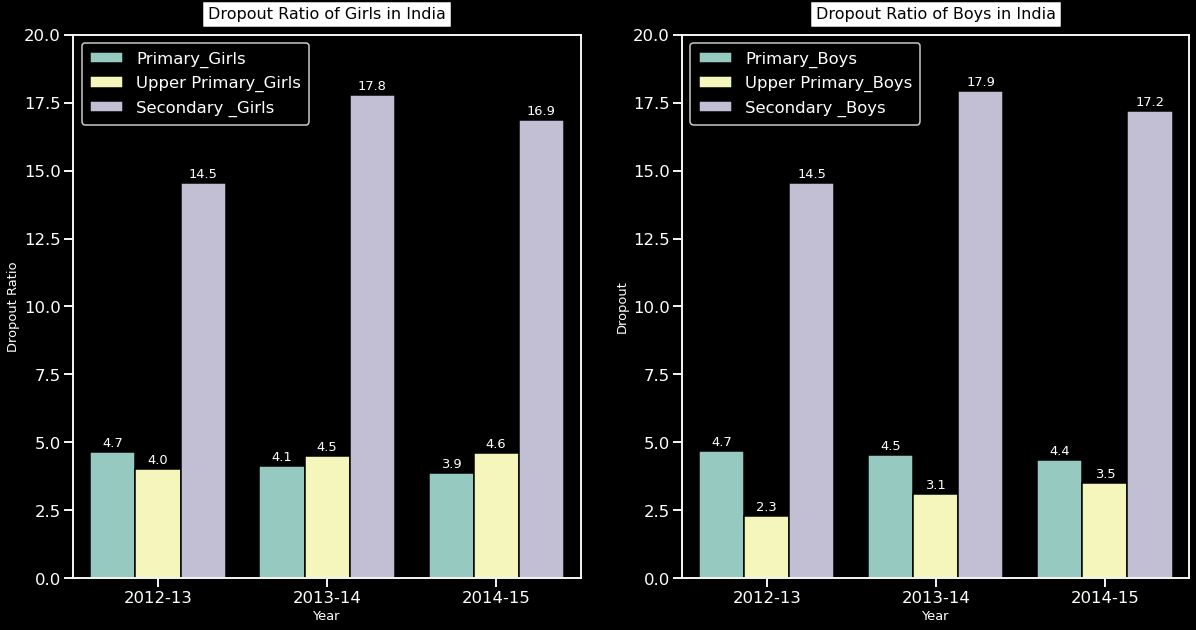

In [73]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('dark_background')

# creating two subplots: girls and boys
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# -------------------------------------------------------------- #

# barplot for girls
dr_girls_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_girls,edgecolor='black',ax=axes[0])
dr_girls_bplot.set(ylim=(0, 20))
for p in dr_girls_bplot.patches:
    dr_girls_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[0].set_title('Dropout Ratio of Girls in India',size = 16 , pad = 16, color='black',bbox=dict(facecolor='white', alpha=1.0))

axes[0].set_ylabel('Dropout Ratio',size=13)
axes[0].set_xlabel('Year',size=13)

dr_girls_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

# ------------------------------------------------------------------- #

# barplot for boys
dr_boys_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_boys,edgecolor='black',ax=axes[1])
dr_boys_bplot.set(ylim=(0, 20))
for p in dr_boys_bplot.patches:
    dr_boys_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[1].set_title('Dropout Ratio of Boys in India',size = 16 , pad = 16, color='black',bbox=dict(facecolor='white', alpha=1.0))

axes[1].set_ylabel('Dropout',size=13)
axes[1].set_xlabel('Year',size=13)

dr_boys_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

**What is Dropout Ratio?**

There are varying definitions on the web for Dropout Ratio. I will keep it simple here. Dropout Ratio simply means any student who leaves school for any reason before graduation or completion of a program of studies without transferring to another school.

It is very clear from the graph that we have high number of dropouts from **Secondary Girls**. Secondary Education entails 9th and 10th grades. So, there could be many reasons why the dropout is increasing at this grade level. It could be one of these reasons:

- Students feel the pressure of 10th board exams and do not possess the will to continue education thereafter.
- Since India is a developing country, many girl students from rural areas do not have support to continue education after reaching this grade and they simply think this level of education is enough for girls.
- etc.
- The same pattern of Dropout Ratio is being repeated for Boys as well.
- This is a very serious issue that Indian Government should be considering and find the root cause for it to solve this problem.

## State-wise Dropout Ratio

If you carefully observed our `df_dr` dataframe after dropping rows, you'd notice that a lot of rows had `NR` in them. As I said it's unfair to put 0 as their value because we'd be taking 0 as our actual GER or Drop Out Ratio value. So, dropping those rows entirely seems the right way to make some head way in our analysis.

Since Dropout Ratio file has so many `NR` values, I decided that I will consider only those states which have all 3 years records for my **State-wise Dropout Ratio analysis**. This seems fair to me. Let me know your thoughts on this or if there's another work around. 

In [74]:
dr_states = (pd.concat(g for _, g in df_dr.groupby("State_UT") if len(g) == 3)).reset_index(drop=True)

In [75]:
dr_states.State_UT.unique()

array(['Gujarat', 'Himachal Pradesh', 'Jammu & Kashmir', 'Nagaland',
       'Puducherry', 'Punjab', 'Sikkim', 'Tripura', 'West Bengal'],
      dtype=object)

In [76]:
dr_girls_list = ['State_UT','year','Primary_Girls','Upper Primary_Girls','Secondary _Girls','HrSecondary_Girls']
dr_boys_list = ['State_UT','year','Primary_Boys','Upper Primary_Boys','Secondary _Boys','HrSecondary_Boys']

In [77]:
#renaming state names
dr_states['State_UT'].replace({'Jammu & Kashmir':'J & K'}, inplace=True)

dr_states_girls = dr_states.loc[:,dr_girls_list]
dr_states_boys = dr_states.loc[:,dr_boys_list]

In [78]:
# Merging `dr_states_girls` and `map_df`

merged_girls = map_df.set_index('st_nm').join(dr_states_girls.set_index('State_UT')).dropna()
merged_boys = map_df.set_index('st_nm').join(dr_states_boys.set_index('State_UT')).dropna()

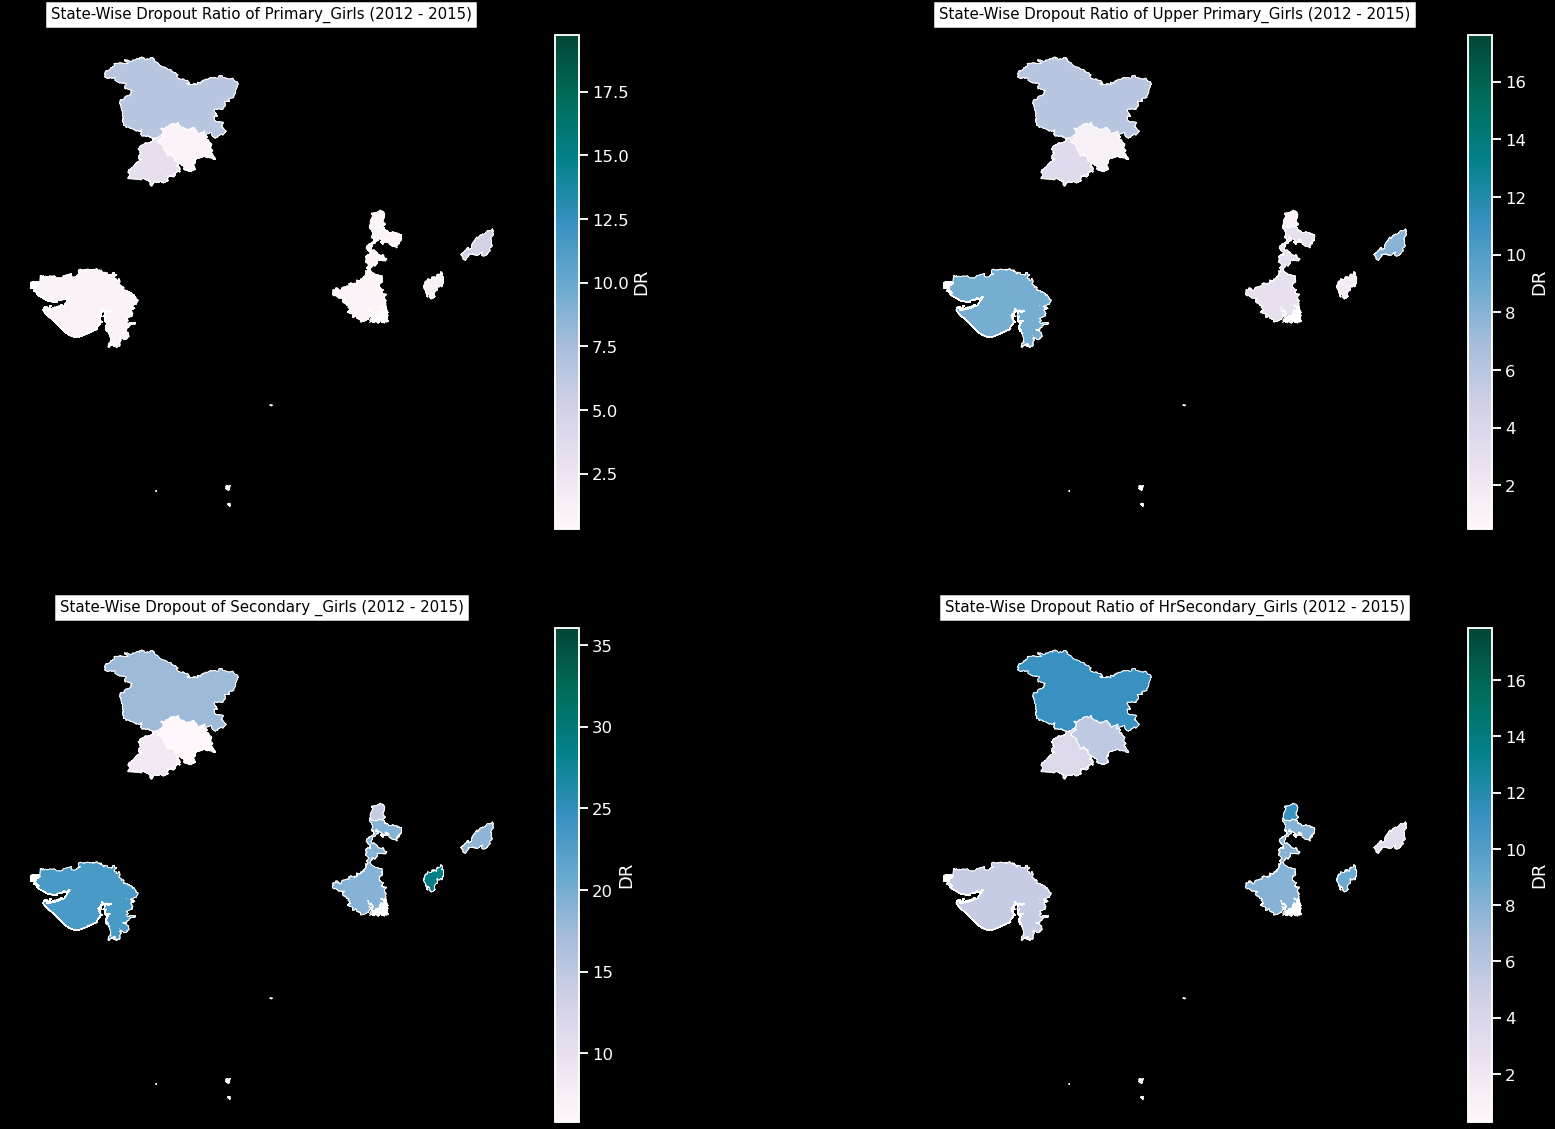

In [79]:
# State-wise plots of Dropout Ratio for Girls in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'PuBuGn'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise Dropout Ratio of Primary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g1 = merged_girls.plot(column='Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[0,1].set_title("State-Wise Dropout Ratio of Upper Primary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g2 = merged_girls.plot(column='Upper Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,0].set_title("State-Wise Dropout of Secondary _Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
g3 = merged_girls.plot(column='Secondary _Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,1].set_title("State-Wise Dropout Ratio of HrSecondary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g4 = merged_girls.plot(column='HrSecondary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

### Girls

- A very low Dropout Ratio in Primary girls is a good sign.
- Gujarat failed to decrease Dropout Ratio in Upper Primary and Secondary Girls. However, Gujarat has the least dropout ratio in Higher Secondary Girls.
- We can see that the dropout ratio keeps on increasing as the grade levels are increasing.

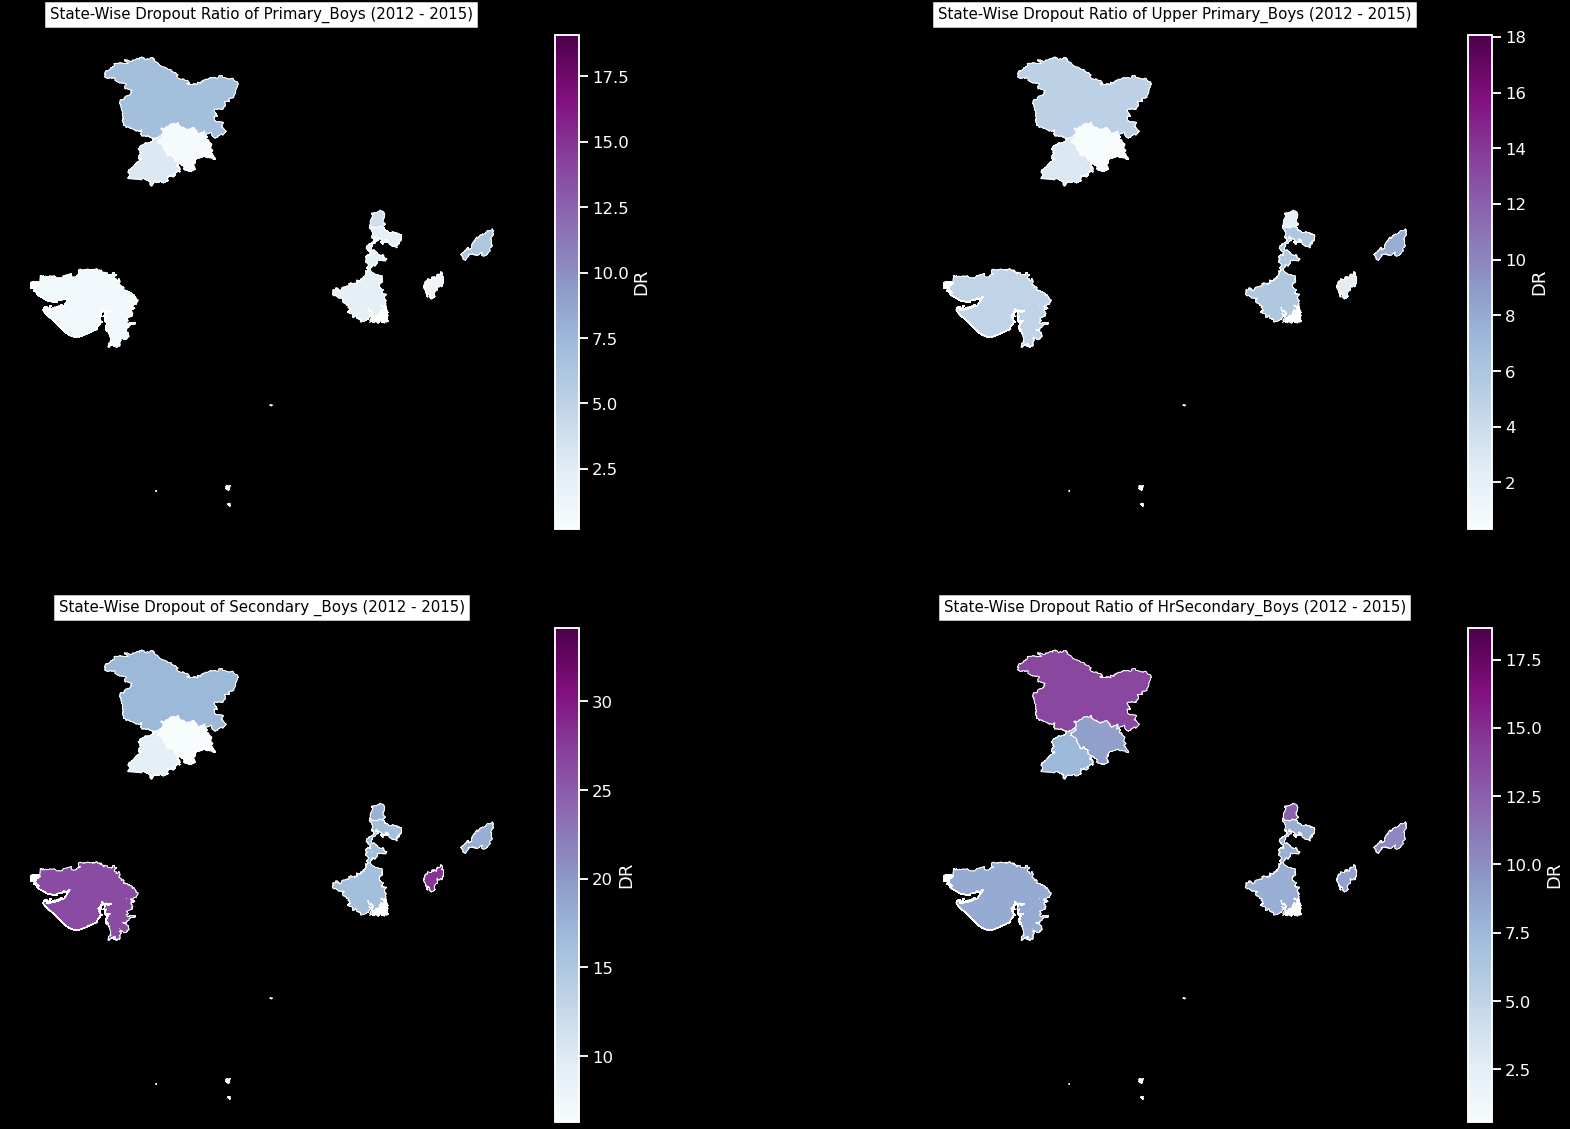

In [80]:
# State-wise plots of Dropout Ratio for Boys in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'BuPu'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise Dropout Ratio of Primary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b1 = merged_boys.plot(column='Primary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[0,1].set_title("State-Wise Dropout Ratio of Upper Primary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b2 = merged_boys.plot(column='Upper Primary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,0].set_title("State-Wise Dropout of Secondary _Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
b3 = merged_boys.plot(column='Secondary _Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,1].set_title("State-Wise Dropout Ratio of HrSecondary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b4 = merged_boys.plot(column='HrSecondary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

### Boys

- A very low dropout ratio for Boys in both Primary and Upper Primary grades.
- Gujarat again fails to lower the dropout ratio among boys as well in Secondary grades.
- A same pattern follows for Higher Secondary Boys as Girls.

## Note

The dataset for these statistics are acquired from Indian Government's Open Data Source Portal. It's really concerning to see so much of data is Not Recorded for both GER and Dropout Ratio.

# Percentage of Schools with Electricity, Water, Toilet and Computer Facilities

In [81]:
df_water = pd.read_csv('../input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv')
df_comps = pd.read_csv('../input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv')
df_elec = pd.read_csv('../input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv')
df_g_toilet = pd.read_csv('/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv')
df_b_toilet = pd.read_csv('/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv')

In [82]:
# Arrange the `year` column in ascending order
df_water = df_water.sort_values('Year',ascending=True)
df_comps = df_comps.sort_values('year',ascending=True)
df_elec = df_elec.sort_values('year',ascending=True)
df_g_toilet = df_g_toilet.sort_values('year',ascending=True)
df_b_toilet = df_g_toilet.sort_values('year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
water_ai = df_water[df_water['State/UT'] == 'All India'].reset_index(drop=True)
comps_ai = df_comps[df_comps['State_UT'] == 'All India'].reset_index(drop=True)
elec_ai = df_elec[df_elec['State_UT'] == 'All India'].reset_index(drop=True)
gt_ai = df_g_toilet[df_g_toilet['State_UT'] == 'All India'].reset_index(drop=True)
bt_ai = df_b_toilet[df_b_toilet['State_UT'] == 'All India'].reset_index(drop=True)

In [83]:
water_columns = ['State/UT','Year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
comps_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
elec_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
gbt_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']

In [84]:
water_ai = water_ai.loc[:,water_columns]
comps_ai = comps_ai.loc[:,comps_columns]
elec_ai = elec_ai.loc[:,elec_columns]
gt_ai = gt_ai.loc[:,gbt_columns]
bt_ai = bt_ai.loc[:,gbt_columns]

In [85]:
print("Water Facilities - All India (2013-2016)")
display(water_ai)

Water Facilities - All India (2013-2016)


,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,94.09,93.90,96.52,97.14
1,All India,2014-15,94.88,94.82,96.32,98.23
2,All India,2015-16,95.78,95.65,97.05,97.92


In [86]:
print("Computer Facilities - All India (2013-2016)")
display(comps_ai)

Computer Facilities - All India (2013-2016)


,State_UT,year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,9.25,18.22,44.80,26.65
1,All India,2014-15,10.32,19.40,51.27,47.96
2,All India,2015-16,10.36,19.78,53.05,55.72


In [87]:
print("Electricy Facilities - All India (2013-2016)")
display(elec_ai)

Electricy Facilities - All India (2013-2016)


,State_UT,year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,46.38,45.97,75.08,91.01
1,All India,2014-15,49.63,48.33,77.55,92.67
2,All India,2015-16,52.40,49.86,81.50,92.86


In [88]:
print("Toilet Facilities for Girls - All India (2013-2016)")
display(gt_ai)

Toilet Facilities for Girls - All India (2013-2016)


,State_UT,year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,88.68,91.39,99.06,76.14
1,All India,2014-15,91.21,91.39,90.26,90.94
2,All India,2015-16,96.95,96.32,95.18,96.22


In [89]:
print("Toilet Facilities for Boys - All India (2013-2016)")
display(bt_ai)

Toilet Facilities for Boys - All India (2013-2016)


,State_UT,year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only
0,All India,2013-14,88.68,91.39,99.06,76.14
1,All India,2014-15,91.21,91.39,90.26,90.94
2,All India,2015-16,96.95,96.32,95.18,96.22


In [90]:
# preparing the dataframe for seaborn plots

tidy_water = pd.melt(water_ai,id_vars=['Year','State/UT']).rename(columns=str.title)
tidy_comps = pd.melt(comps_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_elec = pd.melt(elec_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_gt = pd.melt(gt_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_bt = pd.melt(bt_ai,id_vars=['year','State_UT']).rename(columns=str.title)

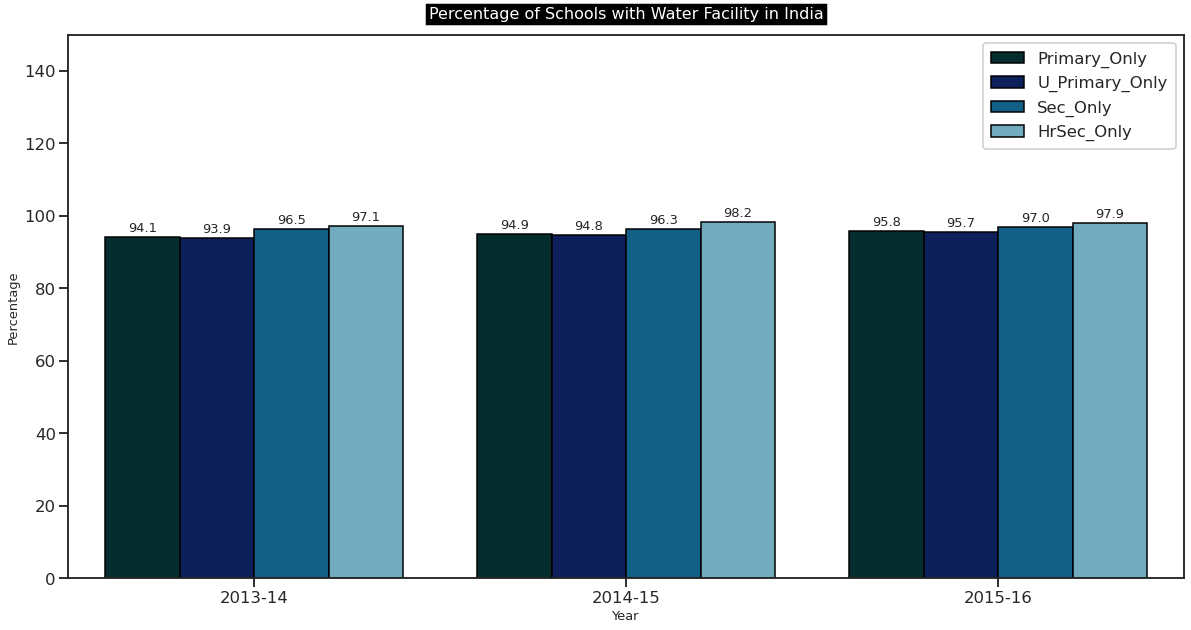

In [91]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for water facility
water_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_water,palette = 'ocean',edgecolor='black',ax=axes)
water_bplot.set(ylim=(0, 150))
for p in water_bplot.patches:
    water_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Water Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

water_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- This plot makes me really happy as there is a consistent increase and nearly 98% of the schools have water facilities for children across India.

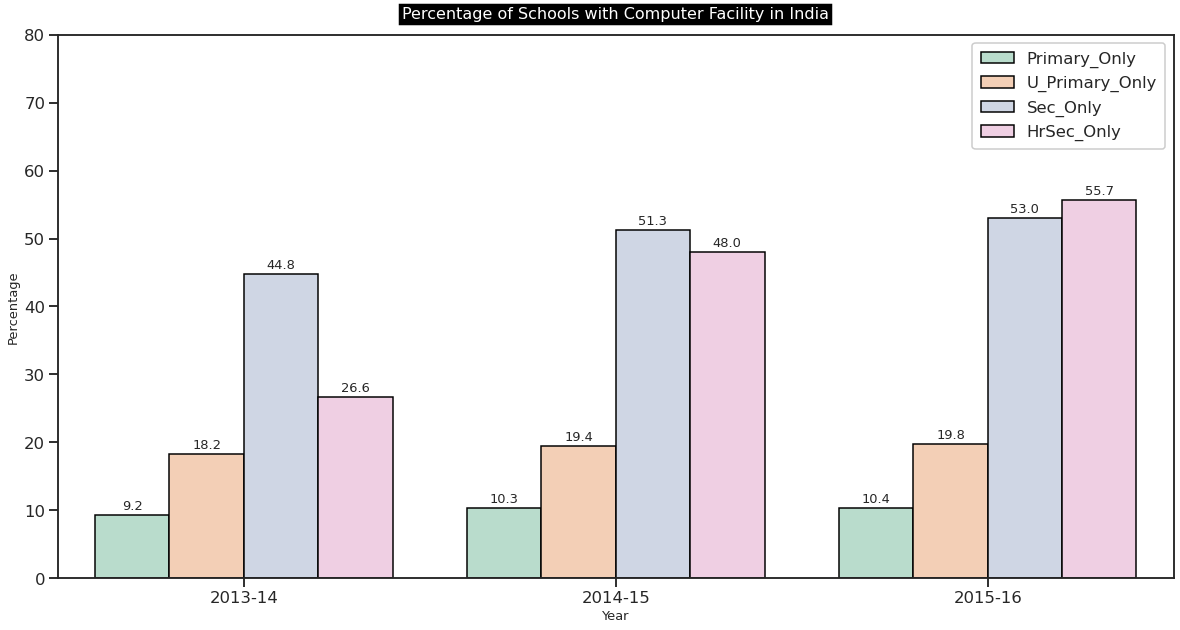

In [92]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for computer facility
comps_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_comps,palette = 'Pastel2',edgecolor='black',ax=axes)
comps_bplot.set(ylim=(0, 80))
for p in comps_bplot.patches:
    comps_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Computer Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

comps_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- In a world where Artificial Intelligence is taking over and technology keeps progressing by the minute, it's not just a want but a need to get the students up to date with new technology by giving them Computer Facilities starting from Primary Schools.
- Although there is a small increase every year, it's considerably low. I hope Indian Government takes this into account.

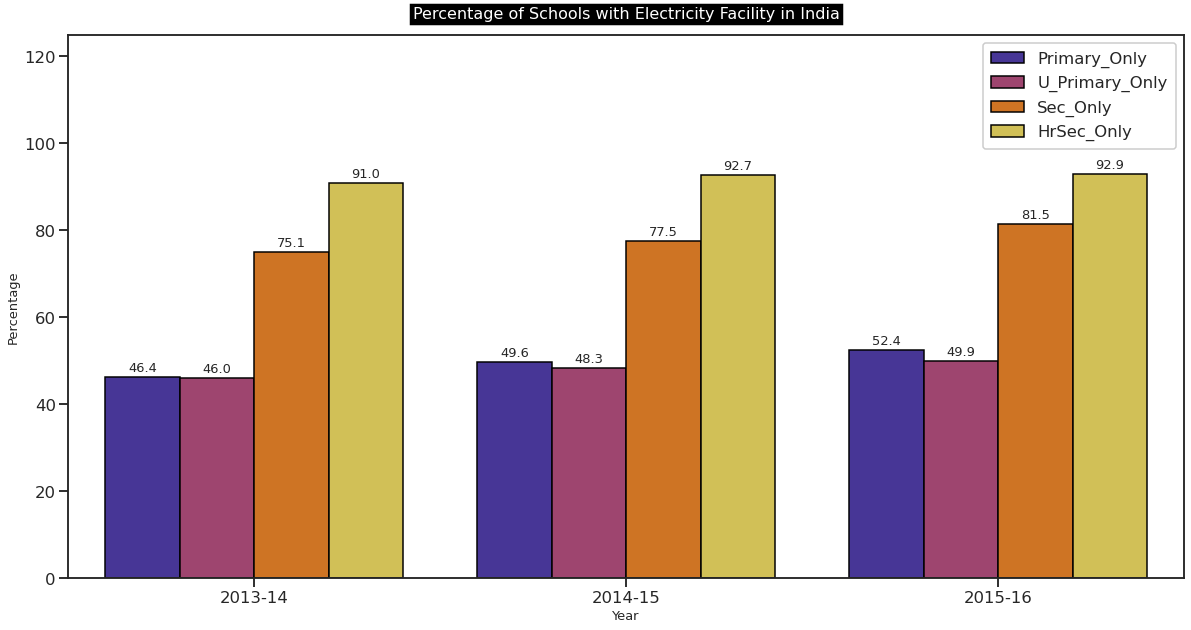

In [93]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for electricity facility
elec_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_elec,palette = 'CMRmap',edgecolor='black',ax=axes)
elec_bplot.set(ylim=(0, 125))
for p in elec_bplot.patches:
    elec_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Electricity Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

elec_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- Another important need and I see a consistent rise in Percentage across all Schools.

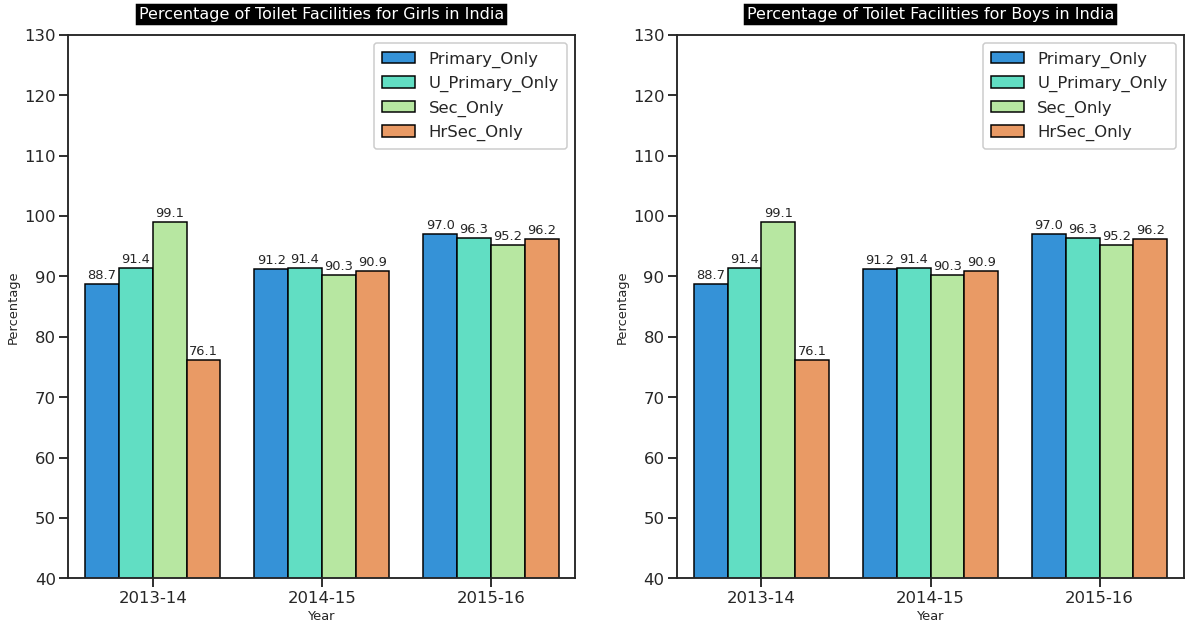

In [94]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

# creating two subplots: girls and boys
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# -------------------------------------------------------------- #

# barplot for girls
t_girls_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_gt,palette='rainbow',edgecolor='black',ax=axes[0])
t_girls_bplot.set(ylim=(40, 130))
for p in t_girls_bplot.patches:
    t_girls_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[0].set_title('Percentage of Toilet Facilities for Girls in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes[0].set_ylabel('Percentage',size=13)
axes[0].set_xlabel('Year',size=13)

t_girls_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

# ------------------------------------------------------------------- #

# barplot for boys
t_boys_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_bt,palette='rainbow',edgecolor='black',ax=axes[1])
t_boys_bplot.set(ylim=(40, 130))
for p in t_boys_bplot.patches:
    t_boys_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[1].set_title('Percentage of Toilet Facilities for Boys in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes[1].set_ylabel('Percentage',size=13)
axes[1].set_xlabel('Year',size=13)

t_boys_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- If you notice in 2013-14 school year, the facilities of toilets is really low for Higher Secondary Schools but they have a sudden growth from 2014-2015. 
- Thanks to Indian Government that there are many programs and intiatives undertaken by States and the Centre to ensure people have basic sanitary facilities in every field.

# Conclusion

We come to the end of our **Indian Schools - Actions to be taken by Indian Govt** report. I hope you all liked my presentation and this is just a beginning to me. I also hope this is a good starter notebook for beginners. Please let me know if I made any mistake and if there's any other way to improve my reporting and EDA skills. I will be glad to go over them.

In case you find this useful, please **UPVOTE** and leave a **COMMENT**. This would greatly encourage me to pursue Kaggling!

Thank you and Stay Safe!

LinkedIn: [Vidya](https://www.linkedin.com/in/vidyapb/).